<a href="https://colab.research.google.com/github/GabrielS39/DeepLearningProject/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
#X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.15, shuffle=True)
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', use_bias=True),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', use_bias=True),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', use_bias=True),
    #layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=cnn.fit(X_train, y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 24s 10ms/step - loss: 1.4516 - accuracy: 0.4769 - val_loss: 1.2035 - val_accuracy: 0.5630
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0223 - accuracy: 0.6391 - val_loss: 0.9952 - val_accuracy: 0.6509
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7701 - accuracy: 0.7279 - val_loss: 0.9453 - val_accuracy: 0.6728
Epoch 4/10
1250/1250 [==============================] - 12s 9ms/step - loss: 0.5105 - accuracy: 0.8220 - val_loss: 1.1146 - val_accuracy: 0.6541
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2832 - accuracy: 0.9012 - val_loss: 1.4912 - val_accuracy: 0.6332
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1604 - accuracy: 0.9460 - val_loss: 1.7174 - val_accuracy: 0.6497
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1126 - accuracy: 0.9620 - val_loss: 2.0064 - val_

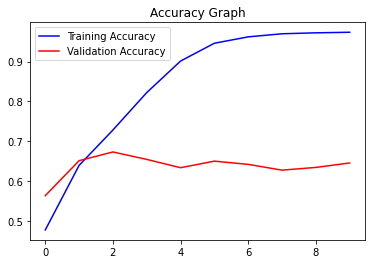

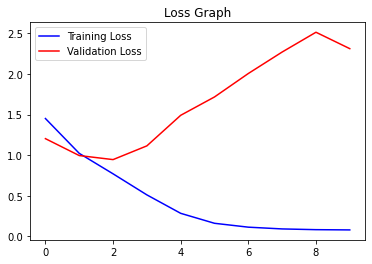

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.svm import SVC

In [ ]:
parameters = [{
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
'C': [1,2,3,300,500],
'max_iter': [1000,100000]}]

In [ ]:
#clf = GridSearchCV(
#       SVC(), parameters, scoring='accuracy'
#    )
#clf.fit(X_train, y_train)

In [ ]:
cnn_drop = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), 
                  #use_bias=True
                  ),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
                  #use_bias=True
                  ),
    #layers.Dropout( 0.2),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu', 
                 #use_bias=True
                 ),
    layers.Dropout( 0.5),
    layers.Dense(10, activation='softmax', 
                 #use_bias=True
                 )
])

In [ ]:
cnn_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_drop=cnn_drop.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7130 - accuracy: 0.3684 - val_loss: 1.4098 - val_accuracy: 0.4908
Epoch 2/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4135 - accuracy: 0.4889 - val_loss: 1.2083 - val_accuracy: 0.5813
Epoch 3/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2932 - accuracy: 0.5379 - val_loss: 1.2581 - val_accuracy: 0.5751
Epoch 4/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2203 - accuracy: 0.5636 - val_loss: 1.0776 - val_accuracy: 0.6295
Epoch 5/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1525 - accuracy: 0.5890 - val_loss: 1.0431 - val_accuracy: 0.6345
Epoch 6/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1149 - accuracy: 0.6043 - val_loss: 0.9938 - val_accuracy: 0.6600
Epoch 7/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0637 - accuracy: 0.6223 - val_loss: 0.9485 - val_accuracy:

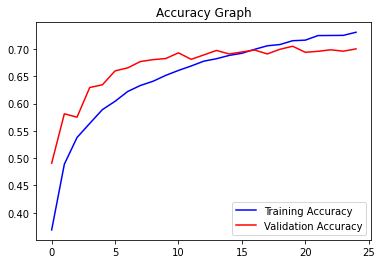

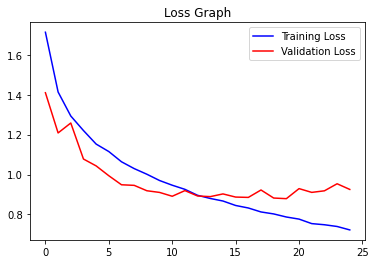

In [ ]:
acc = history_drop.history['accuracy']
val_acc = history_drop.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_drop.history['loss']
val_loss = history_drop.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
cnn_l1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), 
                  #use_bias=True
                  ),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
                  #use_bias=True
                  ),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01)
                 #use_bias=True
                 ),
    layers.Dense(10, activation='softmax', 
                 #use_bias=True
                 )
])

In [ ]:
cnn_l1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_l1=cnn_l1.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 5s 4ms/step - loss: 2.8392 - accuracy: 0.2641 - val_loss: 2.0746 - val_accuracy: 0.3732
Epoch 2/25
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0183 - accuracy: 0.3787 - val_loss: 1.9792 - val_accuracy: 0.3881
Epoch 3/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9477 - accuracy: 0.3958 - val_loss: 1.9430 - val_accuracy: 0.3991
Epoch 4/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9052 - accuracy: 0.4114 - val_loss: 1.9136 - val_accuracy: 0.4121
Epoch 5/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8814 - accuracy: 0.4235 - val_loss: 1.8488 - val_accuracy: 0.4345
Epoch 6/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8579 - accuracy: 0.4319 - val_loss: 1.8587 - val_accuracy: 0.4265
Epoch 7/25
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8453 - accuracy: 0.4373 - val_loss: 1.8230 - val_accuracy:

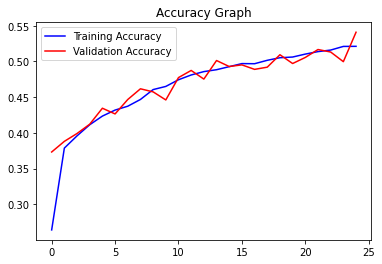

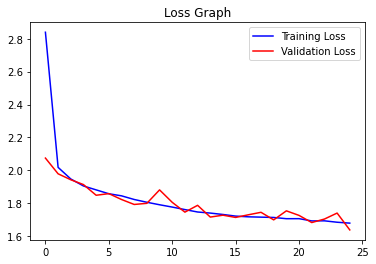

In [ ]:
acc = history_l1.history['accuracy']
val_acc = history_l1.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_l1.history['loss']
val_loss = history_l1.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
cnn_l2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), 
                  #use_bias=True
                  ),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
                  #use_bias=True
                  ),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)
                 #use_bias=True
                 ),
    layers.Dense(10, activation='softmax', 
                 #use_bias=True
                 )
])

In [ ]:
cnn_l2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_l2=cnn_l2.fit(X_train, y_train, epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7325 - accuracy: 0.4087 - val_loss: 1.5183 - val_accuracy: 0.4992
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4389 - accuracy: 0.5275 - val_loss: 1.3768 - val_accuracy: 0.5553
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3328 - accuracy: 0.5762 - val_loss: 1.3063 - val_accuracy: 0.5861
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2675 - accuracy: 0.6021 - val_loss: 1.2356 - val_accuracy: 0.6175
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2278 - accuracy: 0.6147 - val_loss: 1.2200 - val_accuracy: 0.6105
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1978 - accuracy: 0.6276 - val_loss: 1.2387 - val_accuracy: 0.6075
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1748 - accuracy: 0.6381 - val_loss: 1.1611 - val_accuracy:

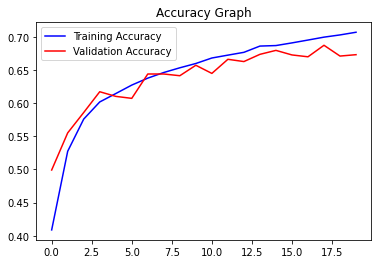

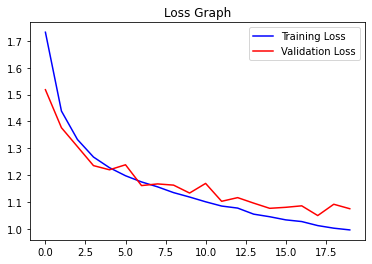

In [ ]:
acc = history_l2.history['accuracy']
val_acc = history_l2.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_l2.history['loss']
val_loss = history_l2.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

In [ ]:
cnn_sgd= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), use_bias=True),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', use_bias=True),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', use_bias=True),
    #layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', use_bias=True),
    #layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

In [ ]:
cnn_sgd.compile(optimizer= opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_sgd=cnn_sgd.fit(X_train, y_train, epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3106 - accuracy: 0.1001 - val_loss: 2.3089 - val_accuracy: 0.0952
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3101 - accuracy: 0.0975 - val_loss: 2.3116 - val_accuracy: 0.0980
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3090 - accuracy: 0.0995 - val_loss: 2.3038 - val_accuracy: 0.1014
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3093 - accuracy: 0.1002 - val_loss: 2.3073 - val_accuracy: 0.0952
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3101 - accuracy: 0.0992 - val_loss: 2.3072 - val_accuracy: 0.1016
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3099 - accuracy: 0.0997 - val_loss: 2.3098 - val_accuracy: 0.1014
Epoch 7/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3099 - accuracy: 0.1028 - val_loss: 2.3087 - val_ac

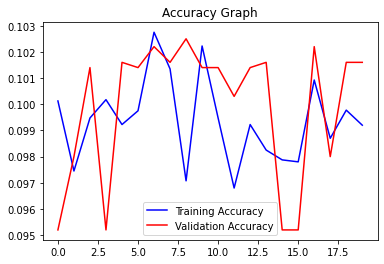

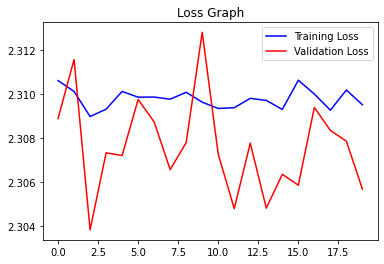

In [ ]:
acc = history_sgd.history['accuracy']
val_acc = history_sgd.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_sgd.history['loss']
val_loss = history_sgd.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

In [ ]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas
from sklearn.model_selection import train_test_split

#data={'Img': X_train,'Label': y_train}

#df=pandas.DataFrame(data)

#df #print the dataframe

from keras.preprocessing.image import ImageDataGenerator
'''train_generator = ImageDataGenerator(
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_iterator = train_generator.flow_from_dataframe(
    df,x_col='Img',
    y_col='Label',
    target_size=(32,32),
    batch_size=532,
    class_mode='raw'
)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')'''

'''train_images1, train_labels), (test_images1, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images1 / 255.0, test_images1 / 255.0
#creating the validation set from the training set
df = pandas.DataFrame(list(zip(train_images, train_labels)), columns =['Image', 'label']) 
val = df.sample(frac=0.2)
X_train = np.array([ i for i in list(val['Image'])])
y_train = np.array([ [i[0]] for i in list(val['label'])])

train_generator = ImageDataGenerator(
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_iterator = train_generator.flow_from_dataframe(
    df,x_col='Image',
    y_col='label',
    target_size=(32,32),
    batch_size=1,
    class_mode='categorical')'''

import keras
import utils

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape)
y_train = keras.utils.np_utils.to_categorical(y_train, len(classes))
y_test = keras.utils.np_utils.to_categorical(y_test, len(classes))

x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    #validation_split=0.2
    )
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

(50000, 32, 32, 3)


In [ ]:
model = models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Dropout( 0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#history_model=model.fit(X_train, y_train, epochs=30,validation_split=0.2)
#print(x_train.shape,y_train.shape)
#print(y_train)
#history_model=model.fit(datagen.flow(x_train, y_train, batch_size=32,
         #subset='training'
         #),
         #validation_data=datagen.flow(x_train, y_train,
         #batch_size=32, subset='validation'),
         #steps_per_epoch=len(x_train) // 32, epochs=20, validation_split=0.2)

history_model=model.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=40, batch_size=64 )

Epoch 1/40
665/665 [==============================] - 4s 5ms/step - loss: 5.2456 - accuracy: 0.1006 - val_loss: 3.7889 - val_accuracy: 0.1061
Epoch 2/40
665/665 [==============================] - 3s 5ms/step - loss: 3.6491 - accuracy: 0.1022 - val_loss: 3.5175 - val_accuracy: 0.0965
Epoch 3/40
665/665 [==============================] - 3s 5ms/step - loss: 3.4093 - accuracy: 0.1023 - val_loss: 3.3064 - val_accuracy: 0.0965
Epoch 4/40
665/665 [==============================] - 3s 4ms/step - loss: 3.2153 - accuracy: 0.1004 - val_loss: 3.1293 - val_accuracy: 0.0952
Epoch 5/40
665/665 [==============================] - 3s 4ms/step - loss: 3.0535 - accuracy: 0.0997 - val_loss: 2.9798 - val_accuracy: 0.0940
Epoch 6/40
665/665 [==============================] - 3s 4ms/step - loss: 2.9139 - accuracy: 0.1016 - val_loss: 2.8486 - val_accuracy: 0.0943
Epoch 7/40
665/665 [==============================] - 3s 5ms/step - loss: 2.7902 - accuracy: 0.1021 - val_loss: 2.7331 - val_accuracy: 0.0948
Epoch 

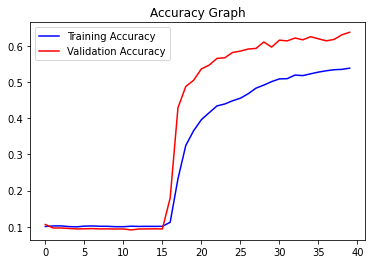

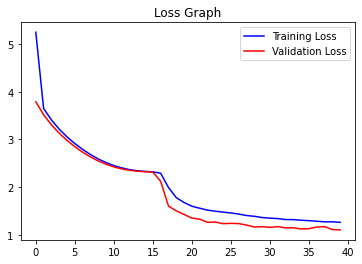

In [ ]:
acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()